In [1]:
%load_ext autoreload
%autoreload 2
import sys

import pandas as pd

sys.path.append("../..")

from mlstm_kernels.utils.benchmark.plot_results import (
    plot_benchmark_result_table,
    rc_context_wrapper,
    select_columns,
)
from pathlib import Path
from plot_config import linestyle_mapping, style_dict
import pickle

In [2]:
# Collect all results batch size 1
falconmamba_gen_file = "/home/beck/wdir/dev_repos/mlstm_kernels/outputs_kernel_benchmarks_final/2024-12-05_13-57-50__gen_time__gentime_falconmamba_cgmtrue_v0/hf_7B_generation_time__pfl0_bs1_tcTrue_weightdtypebfloat16/results.csv"

codestralmamba_gen_file = "/home/beck/wdir/dev_repos/mlstm_kernels/outputs_kernel_benchmarks_final/2024-12-05_15-43-18__gen_time__codestral_mamba_gen_cgmtrue_v0/hf_7B_generation_time__pfl0_bs1_tcTrue_weightdtypebfloat16/results.csv"

mxlstmmamba_gen_file = "/home/beck/wdir/dev_repos/mlstm_kernels/outputs_kernel_benchmarks_final/2024-12-05_08-42-43__gen_time__genttime_xlstm_v1/hf_7B_generation_time__pfl0_bs1_tcTrue_weightdtypebfloat16/results.csv"

llama_gen_file = "/home/beck/wdir/dev_repos/mlstm_kernels/outputs_kernel_benchmarks_final/2024-12-05_15-20-04__gen_time__llama_static_v0/hf_7B_generation_time__pfl0_bs1_tcTrue_weightdtypebfloat16/results.csv"

file_dict = {
    "falconmamba": falconmamba_gen_file,
    "codestralmamba": codestralmamba_gen_file,
    "llama": llama_gen_file,
    "mxlstmmamba": mxlstmmamba_gen_file,
}

In [3]:
dataframe_dict = {
    k: (
        pd.read_csv(v).filter(regex=".*generation|.*R--.*"),
        pd.read_csv(v).filter(regex=".*generation|.*M--.*"),
    )
    for k, v in file_dict.items()
}

In [4]:
gen_time_df = pd.concat([v[0] for v in dataframe_dict.values()], axis=1)
gen_time_df = pd.concat(
    [
        gen_time_df.filter(regex=".*generation.*").take([0], axis=1),
        gen_time_df.filter(regex=".*R--.*") / 1e3,
    ],
    axis=1,
)
gen_time_df

,P--generation_length,R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True,R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True,R--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16
0,64,0.993486,0.631431,0.461524,0.504170,0.407504
1,128,1.987225,1.264578,0.922830,1.014825,0.815703
2,512,7.946974,5.052857,3.902180,4.328458,3.266631
3,1024,15.902392,10.119249,8.549205,9.441146,6.526076
4,2048,31.808961,20.229658,19.323619,21.785773,13.043052
5,4096,63.615465,40.459223,48.119520,54.103895,26.087967
6,8192,127.224078,80.949203,133.775531,153.369484,52.179844
7,16384,254.442937,161.881500,418.571656,486.427781,104.342187


In [5]:
gen_mem_df = pd.concat([v[1] for v in dataframe_dict.values()], axis=1)
gen_mem_df = pd.concat(
    [
        gen_mem_df.filter(regex=".*generation.*").take([0], axis=1),
        gen_mem_df.filter(regex=".*M--.*") / 1e9,
    ],
    axis=1,
)
gen_mem_df

,P--generation_length,M--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True,M--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True,M--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16
0,64,14.926199,15.135179,13.800957,16.362467,14.208881
1,128,14.926199,15.135180,13.834513,16.370856,14.208882
2,512,14.926202,15.135188,14.035846,16.426775,14.208885
3,1024,14.926206,15.135198,14.304291,16.502310,14.208889
4,2048,14.926215,15.135219,14.841180,16.653387,14.208897
5,4096,14.926231,15.135260,15.914959,16.955529,14.208913
6,8192,14.926264,15.135342,18.062516,17.559844,14.208946
7,16384,14.926329,15.135505,22.357631,18.767583,14.209012


In [6]:
raw_data = {
    "gen_time_seconds": gen_time_df,
    "gen_mem_gb": gen_mem_df,
}
with open("gen_time_mem_data.p", "wb") as f:
    pickle.dump(raw_data, f)

for k, v in raw_data.items():
    v.to_csv(f"raw_data_{k}.csv")

In [7]:
with open("gen_time_mem_data.p", "rb") as f:
    raw_data = pickle.load(f)

gen_mem_df = raw_data["gen_mem_gb"]
gen_time_df = raw_data["gen_time_seconds"]

## Plotting the raw data

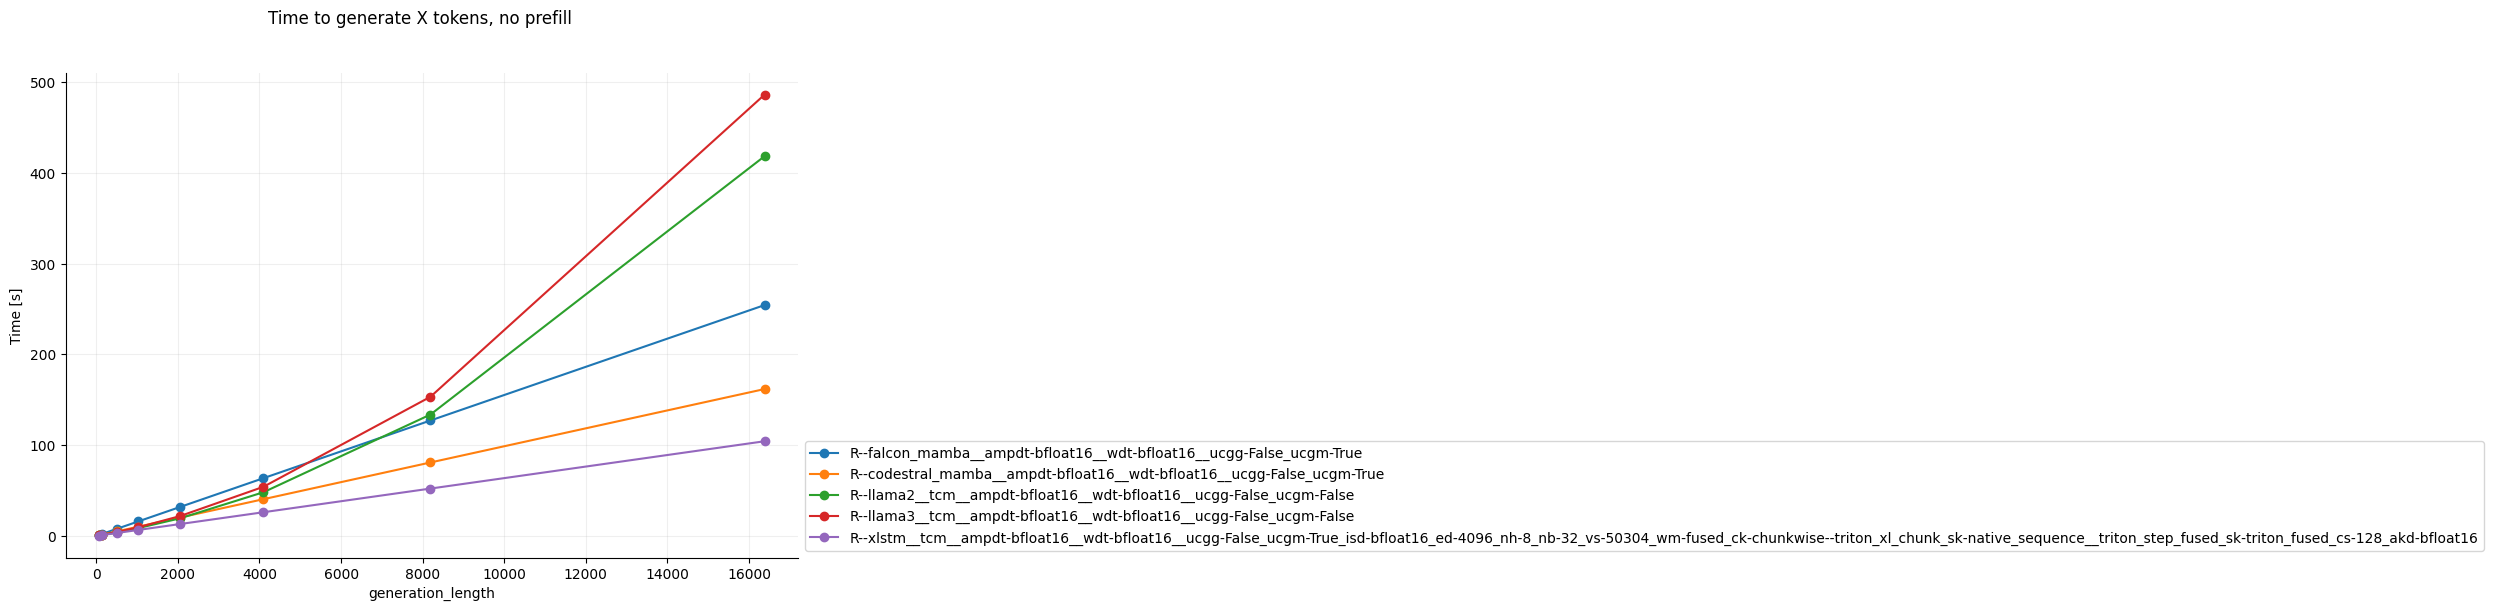

In [8]:
fig = plot_benchmark_result_table(
    gen_time_df,
    x_axis_param="generation_length",
    # linestyle_mapping=linestyle_mapping,
    # style_dict=style_dict,
    style_dict_colname_mapping_exact=False,
    y_label="Time [s]",
    title="Time to generate X tokens, no prefill",
)

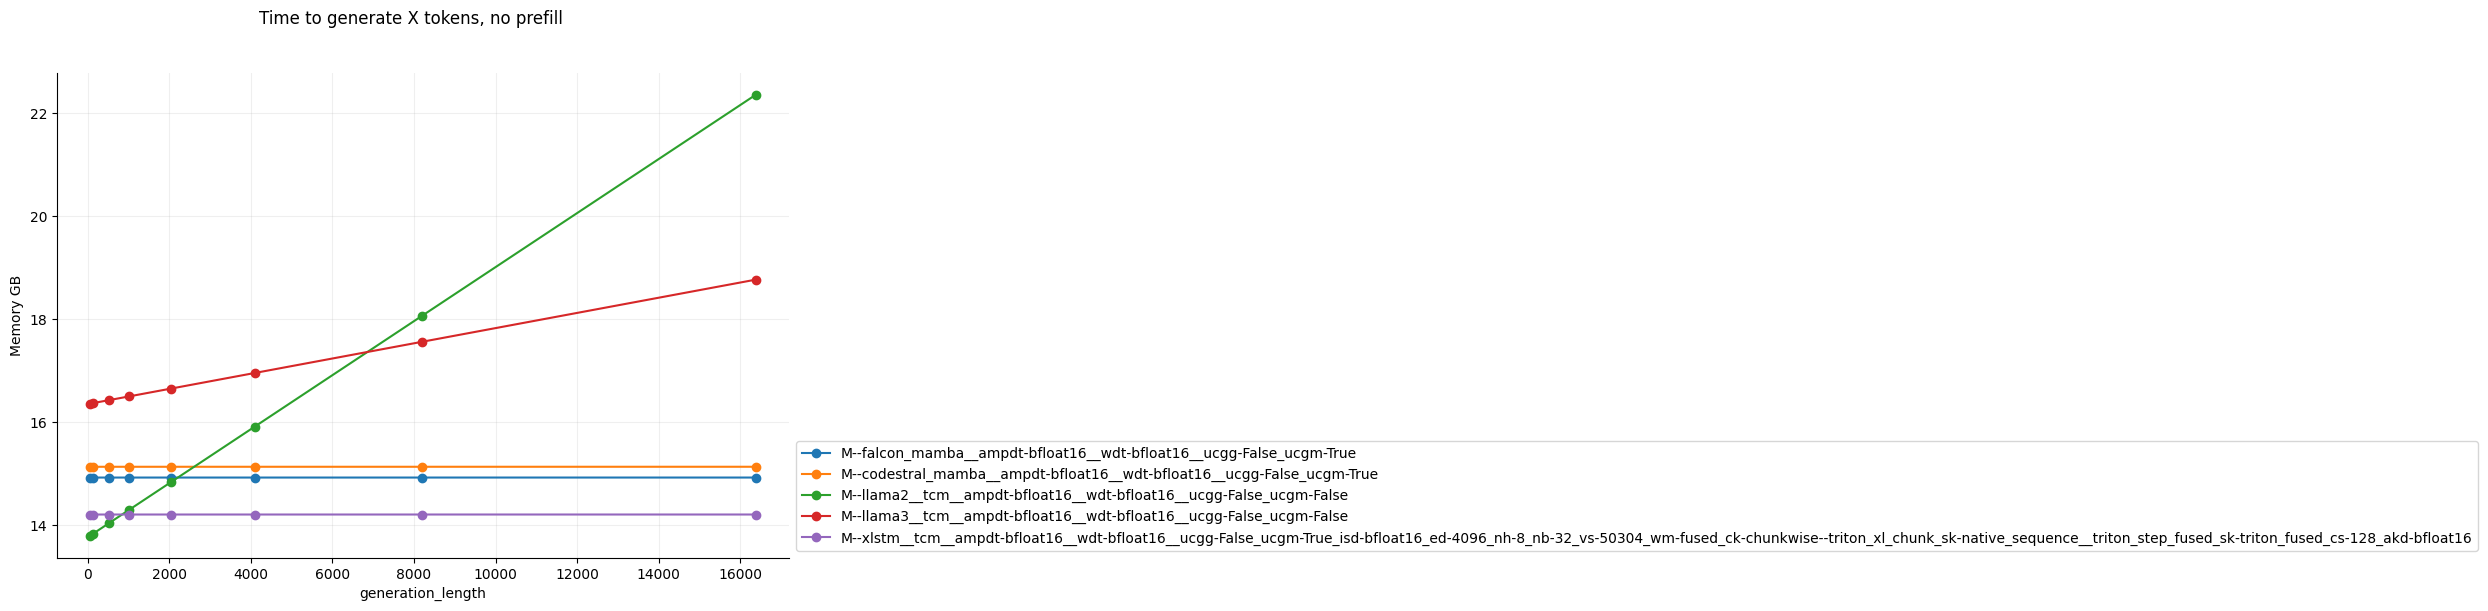

In [9]:
fig = plot_benchmark_result_table(
    gen_mem_df,
    x_axis_param="generation_length",
    # linestyle_mapping=linestyle_mapping,
    # style_dict=style_dict,
    style_dict_colname_mapping_exact=False,
    y_label="Memory GB",
    title="Time to generate X tokens, no prefill",
)

## Final Plots - All results

In [10]:
selected_columns_runtime = {
    "llama3": "R--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "llama2": "R--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "falcon_mamba": "R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "codestral_mamba": "R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "xlstm": "R--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16",
}
selected_columns_memory = {
    "llama2": "M--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "llama3": "M--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "falcon_mamba": "M--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "codestral_mamba": "M--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "xlstm": "M--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16",
}
filename_suffix = ""
add_legend = True

In [11]:
gen_time_plot_df = select_columns(
    gen_time_df, selected_columns_runtime, keep_col_regex=".*generation.*"
)

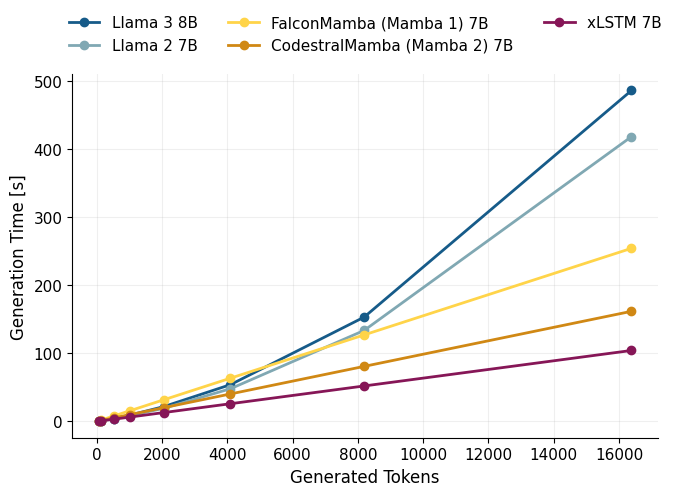

In [12]:
fig = rc_context_wrapper(
    func=plot_benchmark_result_table,
    result_df=gen_time_plot_df,
    x_axis_param="generation_length",
    # linestyle_mapping=linestyle_mapping,
    style_dict=style_dict,
    style_dict_colname_mapping_exact=False,
    y_label="Generation Time [s]",
    x_label="Generated Tokens",
    title="",  # "Time to generate 1 tokens, for varying prefill lengths",
    figsize=(1.6 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54),
    filename=f"generation_time{filename_suffix}",
    add_legend=add_legend,
    legend_args={
        "loc": "lower center",
        "ncol": 3,
        "bbox_to_anchor": (0.0, 1.02, 1.0, 0.502),
        "frameon": False,
        "facecolor": "white",
    },
)

In [13]:
gen_mem_plot_df = select_columns(
    gen_mem_df, selected_columns_memory, keep_col_regex=".*generation.*"
)

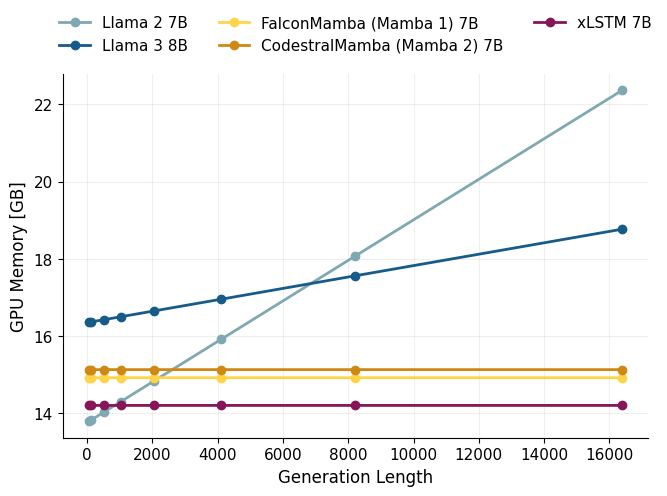

In [14]:
fig = rc_context_wrapper(
    func=plot_benchmark_result_table,
    result_df=gen_mem_plot_df,
    x_axis_param="generation_length",
    # linestyle_mapping=linestyle_mapping,
    style_dict=style_dict,
    style_dict_colname_mapping_exact=False,
    y_label="GPU Memory [GB]",
    x_label="Generation Length",
    title="",  # "Time to generate 100 tokens, for varying prefill lengths",
    figsize=(1.6 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54),
    filename=f"generation_memory{filename_suffix}",
    add_legend=add_legend,
    legend_args={
        "loc": "lower center",
        "ncol": 3,
        "bbox_to_anchor": (0.0, 1.02, 1.0, 0.502),
        "frameon": False,
        "facecolor": "white",
    },
)